In [1]:
import gym
import numpy as np




In [2]:
#Setting up the environment
env=gym.make("MountainCar-v0")

#All our variables and constants
#Model
LEARNING_RATE=0.1
DISCOUNT=0.95
#Number of episodes for our agent to go through
EPISODES=123
#Show an example on the screen every 2000 episodes
SHOW_EVERY = 20
#Our discrete bucketing of the observatrion space
DISCRETE_OS_SIZE=[30]*len(env.observation_space.high)
#Our increment for the bucketing
discrete_os_win_size=(env.observation_space.high - env.observation_space.low) / DISCRETE_OS_SIZE
#The epsilon to pilot the randomness of our actions to increase exploration to actually enable learning
epsilon = 0.3
#When do we start to decay epsilon in order to reduce randomness of the actions of our model
START_EPSILON_DECAYING = 1
#End of the decaying of our epsilon
END_EPSILON_DECAYING = EPISODES // 2
#Value of the devaying of our epsilon, by how much do we decrease epislon after each iteration 
epsilon_decay_value = epsilon / (END_EPSILON_DECAYING - START_EPSILON_DECAYING)
#Creation of our Q_table that will store all the different values of our environment space
q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))
total =0
R1 = []
E1 = []



In [3]:
#Quick helper-function that will convert our environment "state," which currently contains continuous 
#values that would wind up making our Q-Table absolutely gigantic and take forever to learn.... to a "discrete" state instead:
def get_discrete_state(state):
    discrete_state = (state-env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(int))

#Looping code for each episode
for episode in range(EPISODES):
    #We print the episode number if we will show it as an example
    if episode%SHOW_EVERY ==0:
        print(episode)
        R1.append(total)
        E1.append(episode)
        total =0
        #Show it
        render=True
    else: 
        #not show it
        render=False
        
        
    #get the discrete_state
    discrete_state=get_discrete_state(env.reset())
    
    done=False
    while not done:
        #Selection of the action for our Cart 
        #Now we just need to use epsilon. We'll use np.random.random() to randomly pick a number 0 to 1. 
        #If np.random.random() is greater than the epsilon value, then we'll go based off the max q value as usual. Otherwise, we will just move randomly:
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)
            
            
        #We perform the step based on the action we determined in the previous lines of code and we collect the result
        new_state, reward, done, _ = env.step(action)
        total+=reward
        #We have a new discrete state now
        new_discrete_state=get_discrete_state(new_state)
        #If we show the example :


        # If simulation did not end yet after last step - we update Q table
        if not done:
            #The max_future_q is grabbed after we've performed our action already, and then we update our previous values based 
            #partially on the next-step's best Q value. Over time, once we've reached the objective once, this "reward" value gets 
            #slowly back-propagated, one step at a time, per episode. Super basic concept, but pretty neat how it works!
            # Maximum possible Q value in next step (for new state)
            max_future_q=np.max(q_table[new_discrete_state])
            # Current Q value (for current state and performed action)
            current_q=q_table[discrete_state+(action, )]
            #THE FORMULA FOR ALL Q VALUES (we update the Q wqith the new value)
            # And here's our equation for a new Q value for current state and action
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
            # Update Q table with new Q value
            q_table[discrete_state+(action,)]=new_q

        # Simulation ended (for any reson) - if goal position is achived - update Q value with reward directly
        elif new_state[0] >= env.goal_position:
            #we display message if we arrived to the flag
            print(f"Flag reached on episode : {episode}")
            q_table[discrete_state + (action,)] = 0

        discrete_state=new_discrete_state

    # Decaying is being done every episode if episode number is within decaying range	
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value

#Once all episodes performed we close the environment
env.close()

0
20
40
60
80
100
120


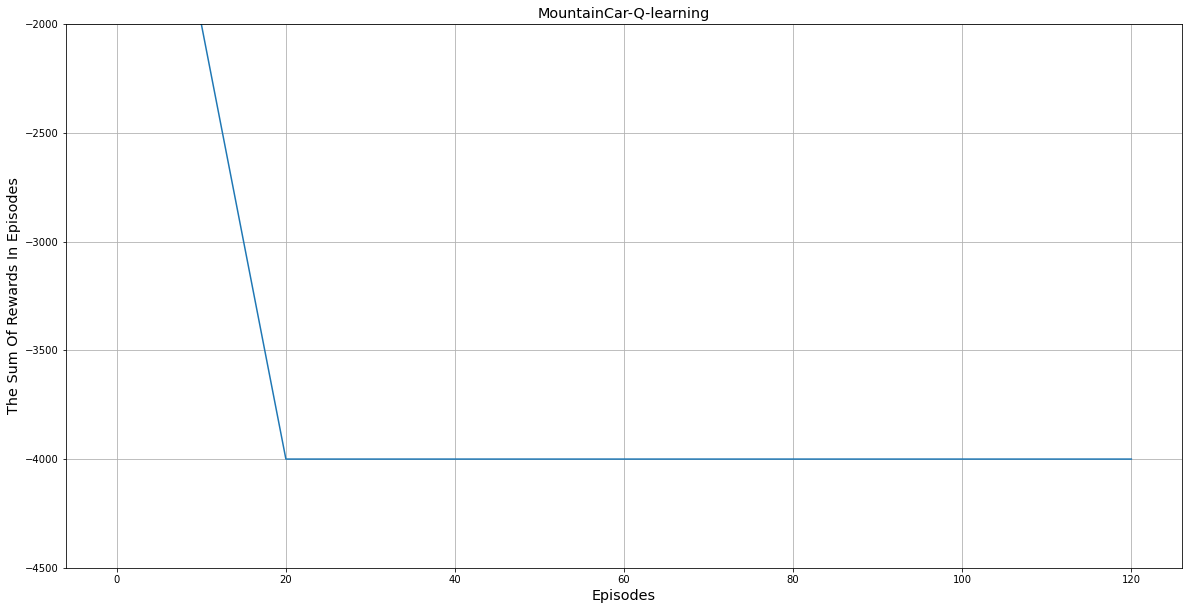

In [4]:
import numpy as np
import matplotlib.pyplot as plt


t = np.array(R1)              # white noise 1
s = np.array(E1)              # white noise 2


params = {'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         }
plt.rcParams.update(params)

fig, ax = plt.subplots()
ax.plot(s, t) 
ax.set(xlabel='Episodes', ylabel='The Sum Of Rewards In Episodes',
       title='MountainCar-Q-learning')
ax.grid()
ax.set_ylim(-4500,-2000)
fig.set_size_inches(20, 10)
fig.savefig('MC-QL.png', dpi=100)


plt.show()